**Team 1 :**
   * Shobhit Aggarwal (shobhita)
   * Ho Kit Fu (hoikitf)
   * Shiyuan Li (shiyuan2)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

matrix = pd.read_csv('./matrix_r.csv', index_col=0)
matrix.columns = ['patient', 'month', 'eng']

In [8]:
matrix.loc[matrix.eng==0,'eng'] = 2
print(matrix.eng.min(), matrix.eng.max())

matrix2 = matrix.pivot_table('eng', ['patient'], 'month')
print(matrix2.shape)

matrix2.head(3)

2 12
(12868, 43)


month    2013-06-01  2013-07-01  2013-08-01  2013-09-01  2013-10-01  \
patient                                                               
0                 2           8           8           2          10   
1                 2           8           8           2           2   
3                 2           2           2           2           2   

month    2013-11-01  2013-12-01  2014-01-01  2014-02-01  2014-03-01  ...  \
patient                                                              ...   
0                 8           2           2           2           2  ...   
1                 8           2           2           2           2  ...   
3                 2           2           2           2           2  ...   

month    2016-03-01  2016-04-01  2016-05-01  2016-06-01  2016-07-01  \
patient                                                               
0                 4           4           4           5           5   
1                 4           2           2           2           2   
3                 2           2           2           2           2   

month    2016-08-01  2016-09-01  2016-10-01  2016-11-01  2016-12-01  
patient                                                              
0                 4           4           4           4           4  
1                 2           2           2           2           2  
3                 2           2           2           2           2  

[3 rows x 43 columns]

In [9]:
data = matrix2.values
data2 = np.zeros((data.shape[0],data.shape[1]),dtype = int)
eng_len = np.zeros(data.shape[0])
ctr = 0;

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if (data[i][j] != 2):
            data2[i][:len(data[i][j:])] = data[i][j:]
            eng_len[i]= len(data[i][j:])
            ctr = ctr + 1
            break;
            
print(np.amax(eng_len))
pd.DataFrame(data2).to_csv('matrix_for_clustering_adjAxis')

43.0


For n_clusters = 2 The average silhouette_score is : 0.2737906262712469
For n_clusters = 3 The average silhouette_score is : 0.2198018698173641
For n_clusters = 4 The average silhouette_score is : 0.17101539006151992


C:\Users\shobh\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.14620622549234336


C:\Users\shobh\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
C:\Users\shobh\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.13566219603477706


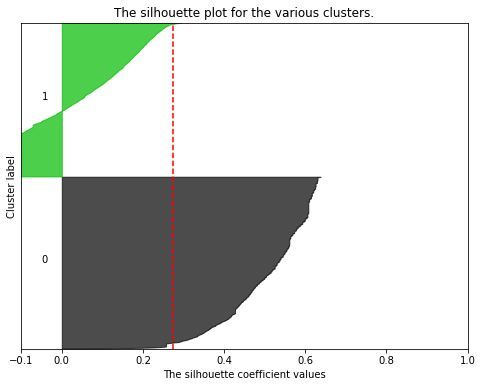

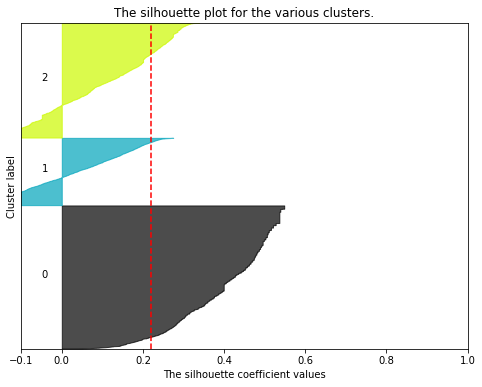

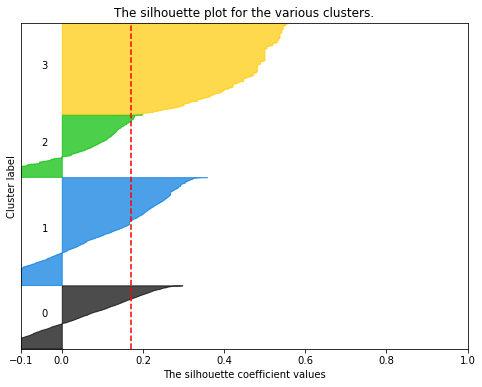

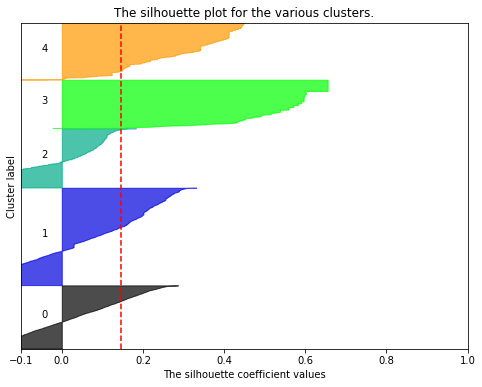

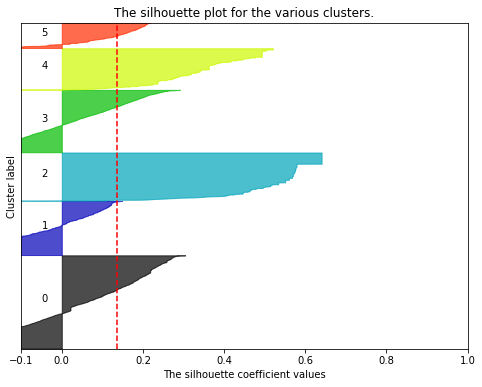

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Using the engagement values for each month as features for clustering
X = data2

range_n_clusters = [2, 3, 4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(8, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    # Dataset
#     results = kmedoids(X, n_clusters, 2, max_steps=3)    
#     cluster_labels = results[1]

    clusterer = KMedoids(metric="euclidean", init="heuristic", n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
#    clusterer = KMedoids(metric="manhattan", n_clusters=n_clusters, max_iter = 5)  

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

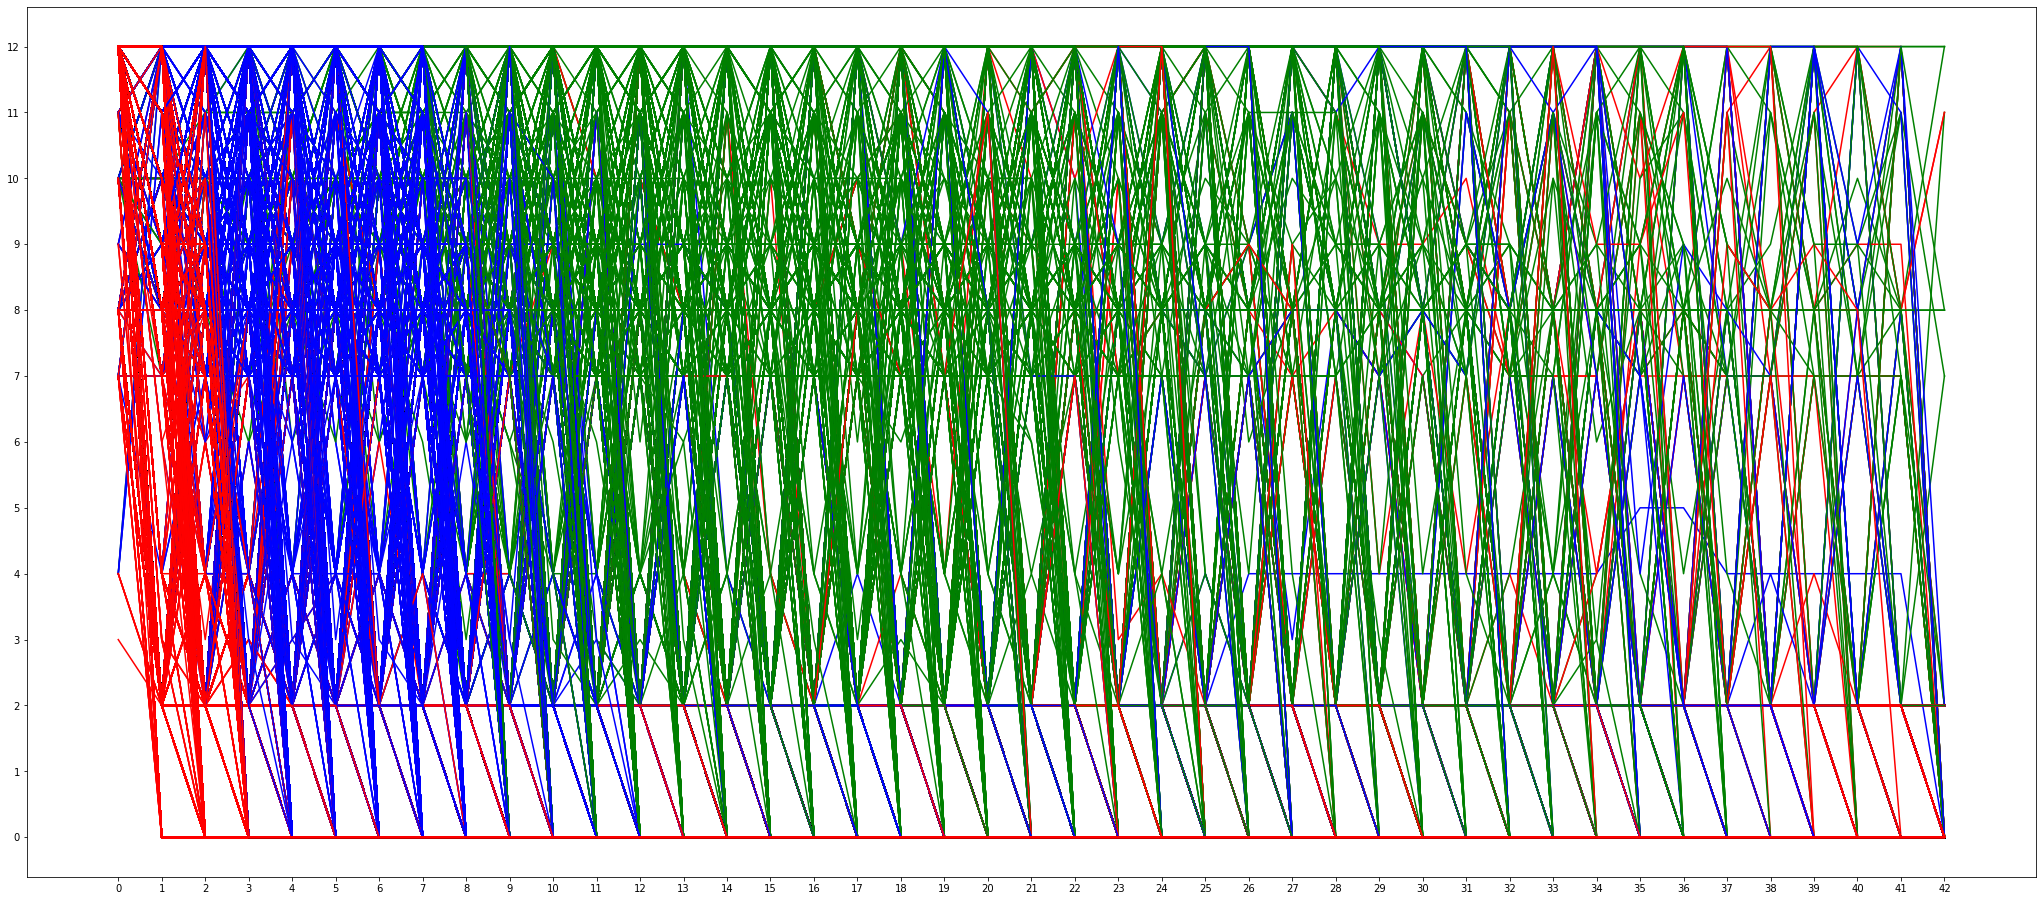

In [20]:
y = data2
x = list(range(data.shape[1]))

clusterer = KMedoids(metric="euclidean", init="heuristic", n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(y)

color = ['red', 'green', 'blue']
cluster_colors = []

for i in cluster_labels:
    cluster_colors.append(color[i])

fig, ax = plt.subplots()
fig.set_size_inches(36, 16)

for i in range(len(y)):
    ax.plot(x, y[i], color=cluster_colors[i])

ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticks(list(range(43)))
plt.show()

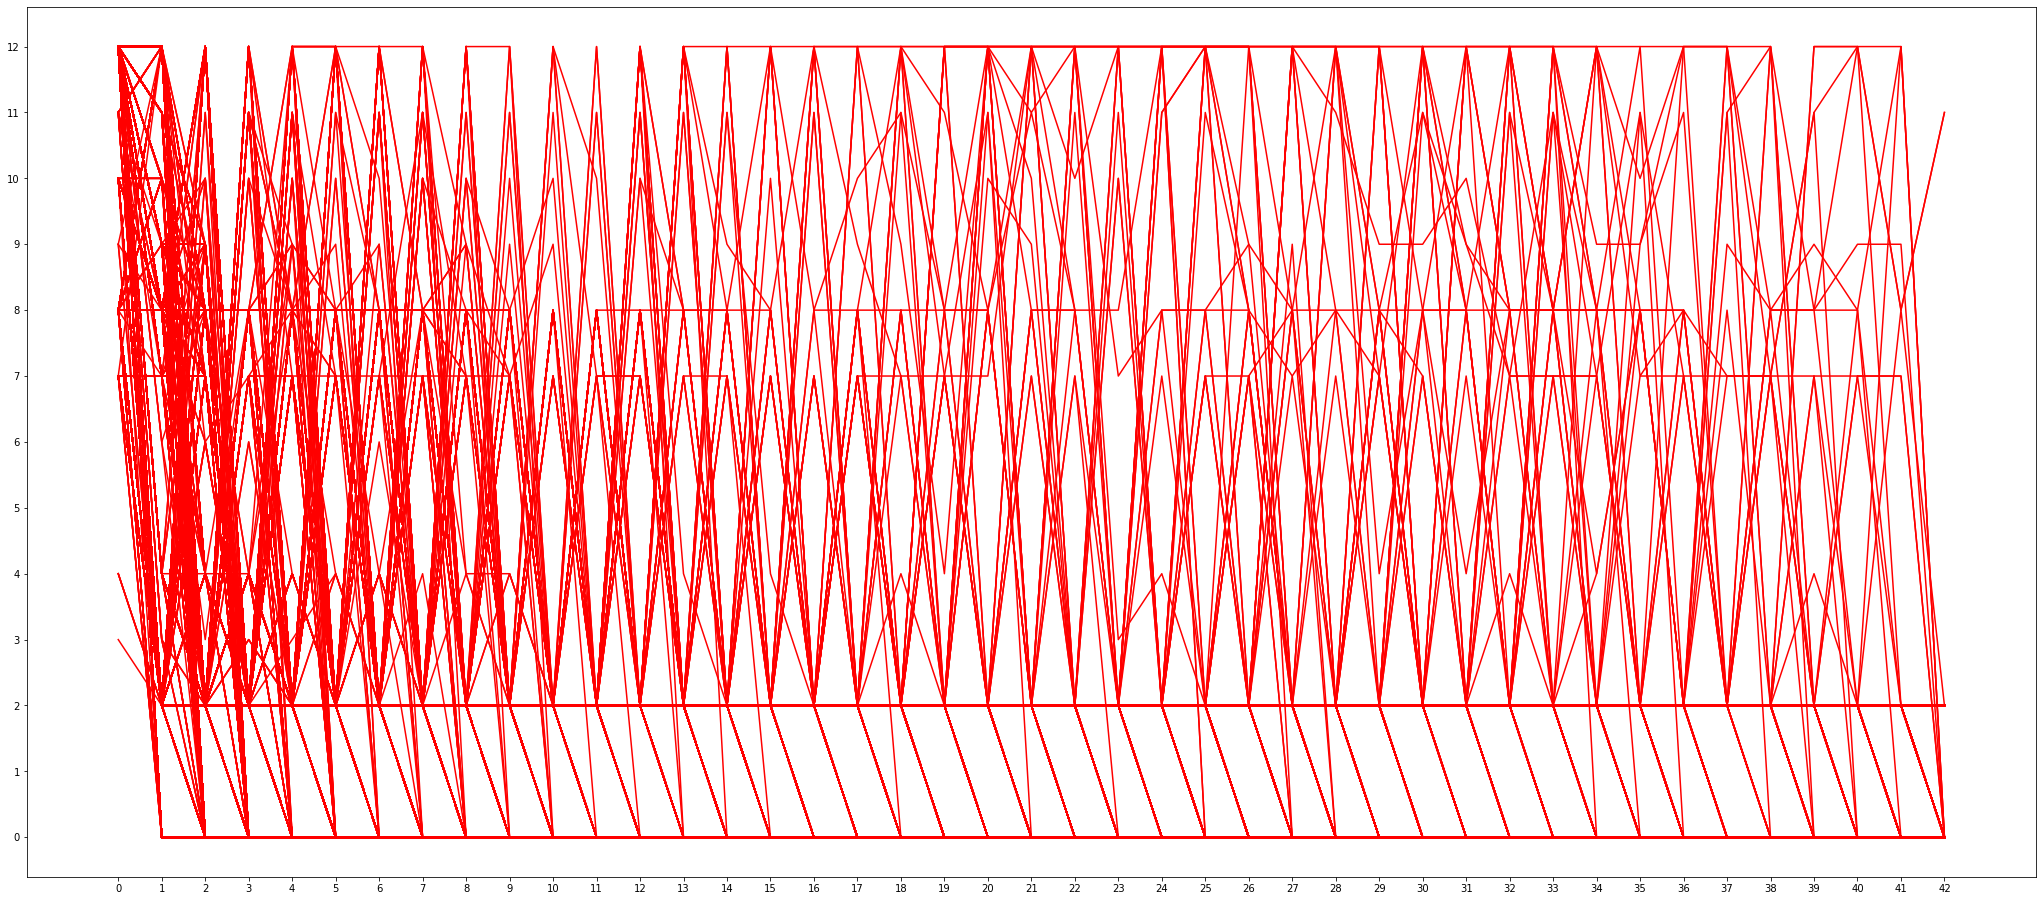

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(36, 16)

for i in range(len(y)):
    if(cluster_colors[i] == 'red'):
        ax.plot(x, y[i], color=cluster_colors[i])

ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticks(list(range(43)))
plt.show()

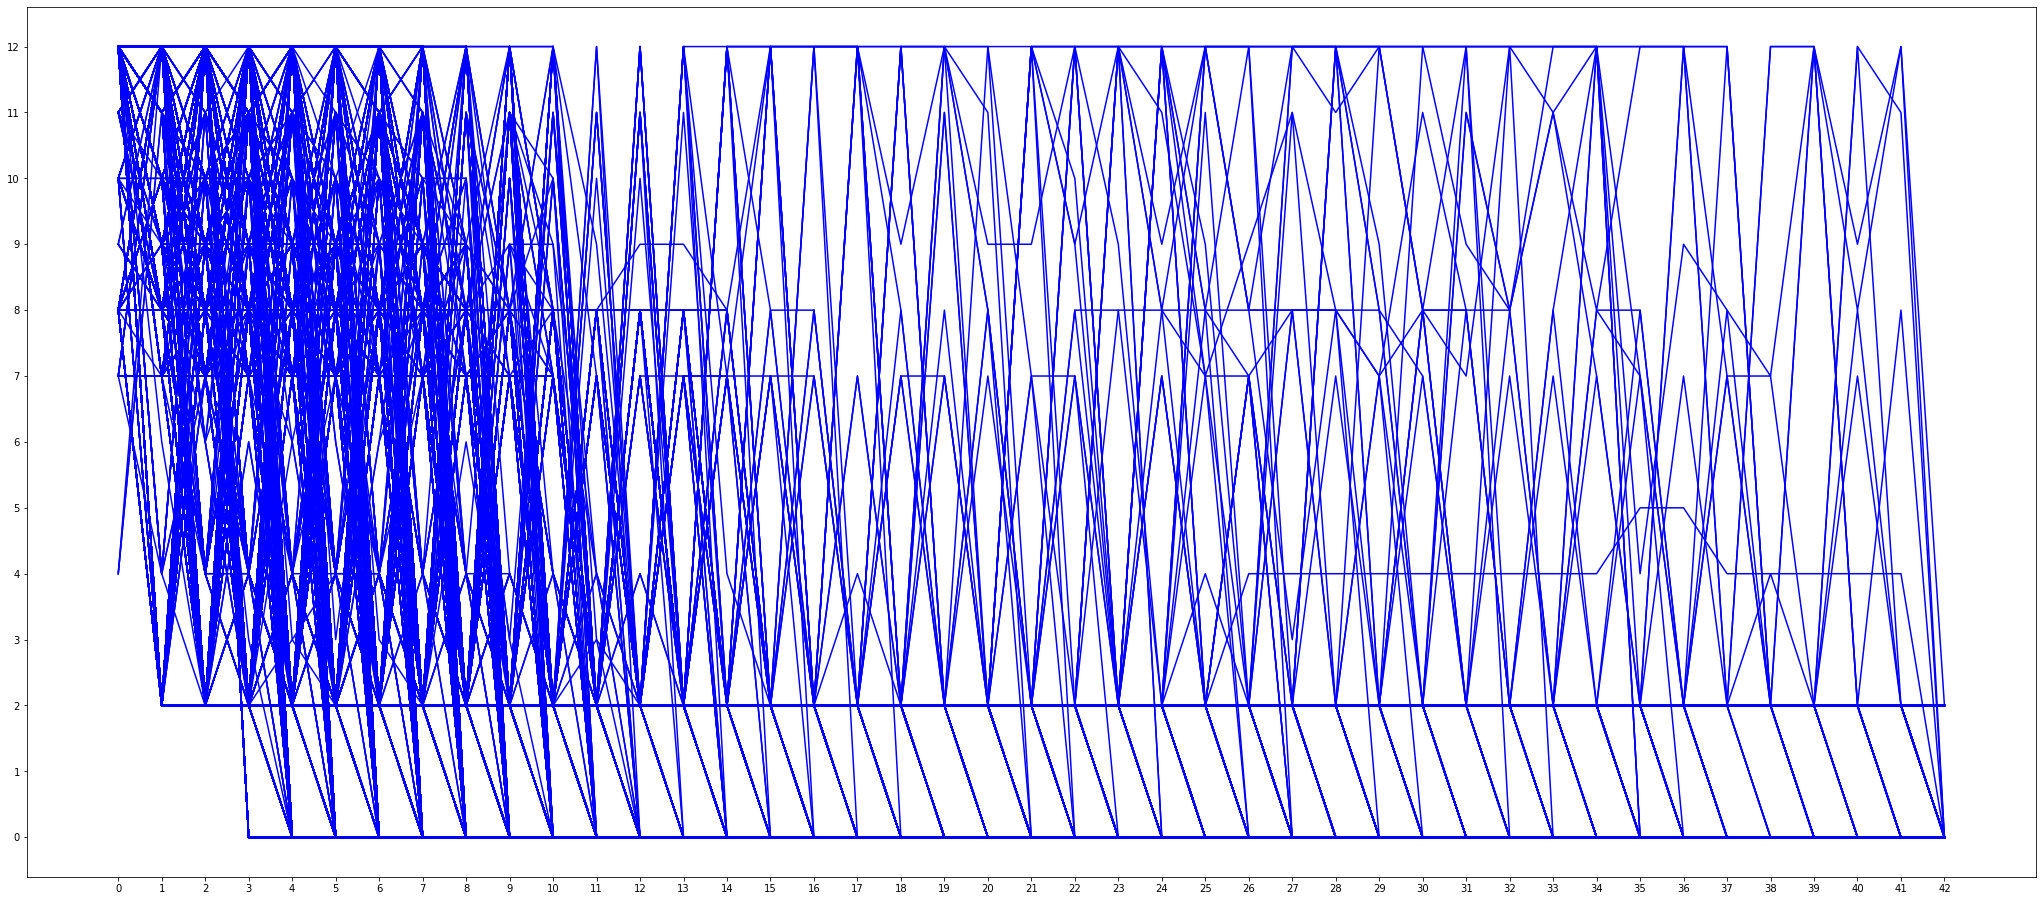

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(36, 16)

for i in range(len(y)):
    if(cluster_colors[i] == 'blue'):
        ax.plot(x, y[i], color=cluster_colors[i])

ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticks(list(range(43)))
plt.show()

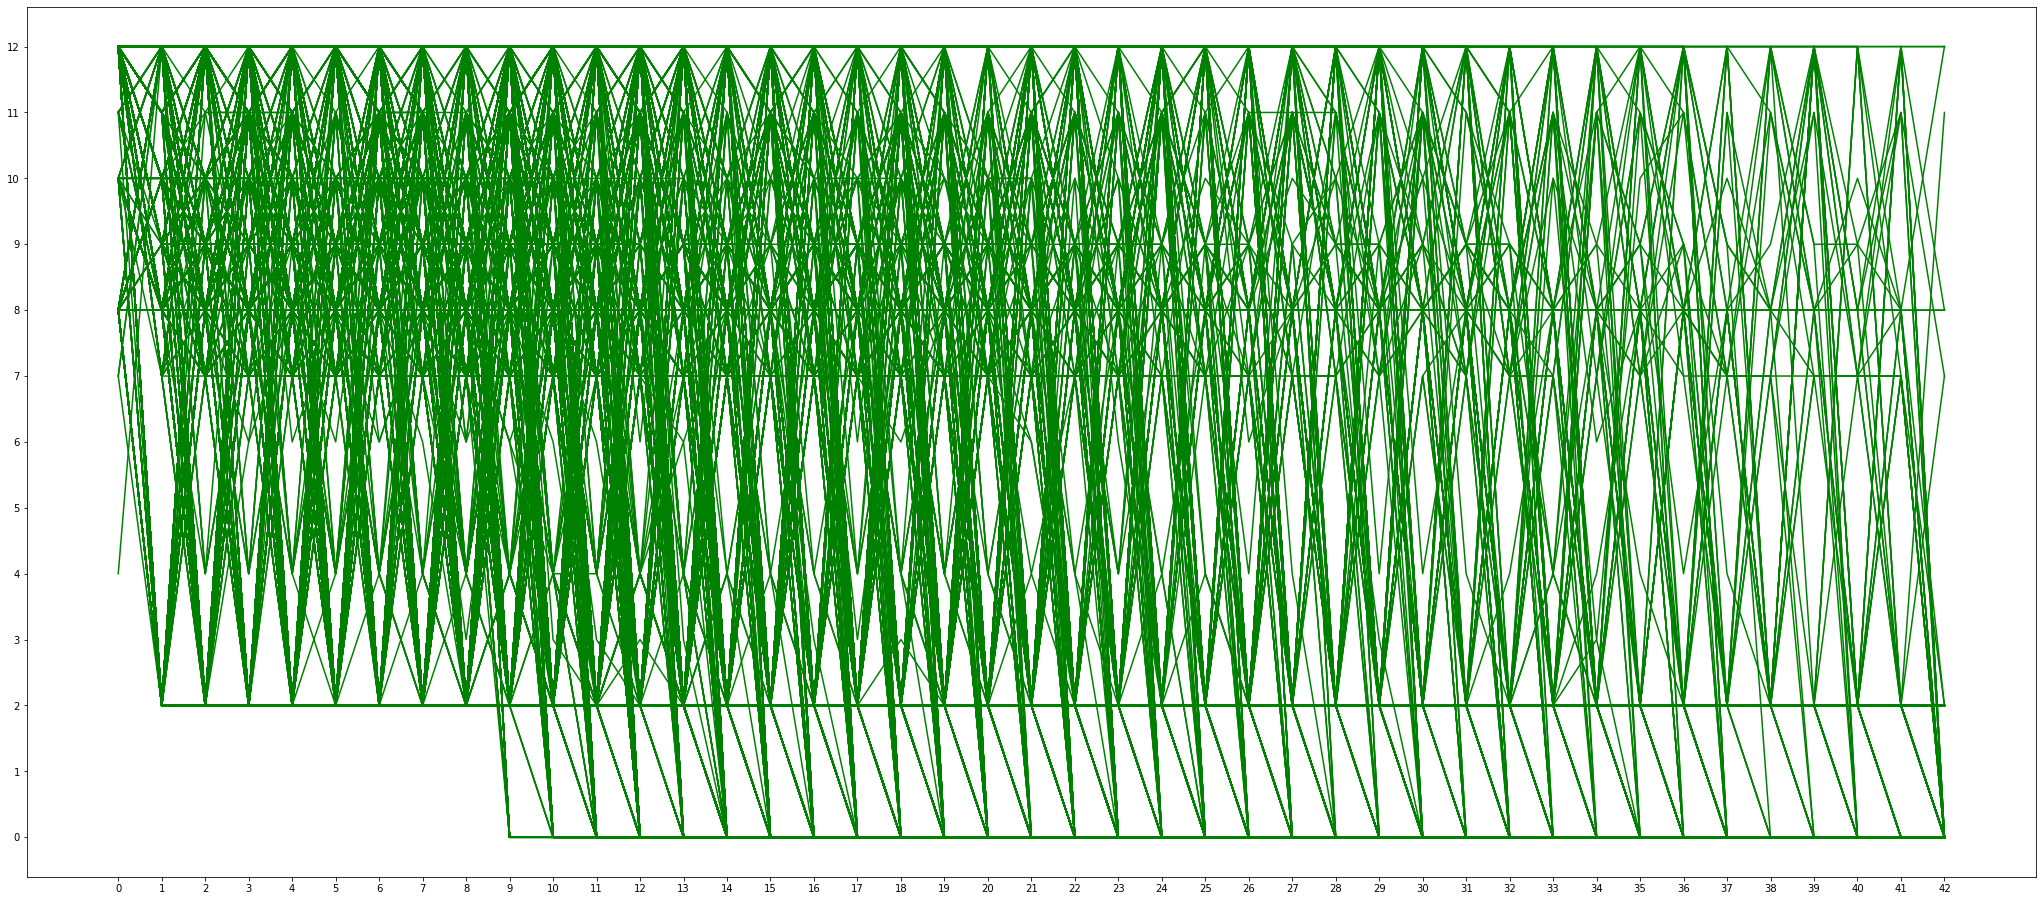

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(36, 16)

for i in range(len(y)):
    if(cluster_colors[i] == 'green'):
        ax.plot(x, y[i], color=cluster_colors[i])

ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticks(list(range(43)))
plt.show()

### Inferences

Data plots graph froom first month of engagement for each patient. X-axis is month of enagagement after their first activity. Y-axis denotes the engagement level.

The above graphs clearly shows difference in density of red(low engagement), blue(medium engaging) and gree(high engaging) patients.

We can observe that the difference between three clusters have different first lengths of engagement for three clusters. But the data spreads across the months, even for red cluster, which we believe is due to the k-medoids model. This can be inferred from silhoutte score.
Considering that the data is longitudinal, other approaches like GBTM might give better insights and clusters.